# Week 6 Session :: PCA

### 손지우

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler

In [43]:
wine = pd.read_csv('Wine.csv', header = None)
wine.columns = ['Class', 'Alcohol', 'Malic acid','Ash', 'Alcalinity of ash',
                'Magnesium', 'Total phenols', 'Flavanoids','Nonflavanoid phenols',
                'Proanthocyanins', 'Color intensity', 'Hue',
                'OD280/OD315 of diluted wines', 'Proline']

wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## PCA, FA 적용 전

In [44]:
X, y = wine.iloc[:, 1:].values, wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [45]:
log_reg = LogisticRegression(multi_class = "ovr", solver = "lbfgs", max_iter = 5000, random_state = 42)
log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)

0.9583333333333334

적용 전 분류모델 성능: 약 95.8%

## PCA 적용 후

In [46]:
X, y = wine.iloc[:, 1:].values, wine.iloc[:, 0].values

X = StandardScaler().fit_transform(X)
features = ['Alcohol', 'Malic acid','Ash', 'Alcalinity of ash',
            'Magnesium', 'Total phenols', 'Flavanoids','Nonflavanoid phenols',
            'Proanthocyanins', 'Color intensity', 'Hue',
            'OD280/OD315 of diluted wines', 'Proline']

pd.DataFrame(data = X, columns = features).head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [47]:
covariance_matrix = np.cov(X.T)

covariance_matrix

array([[ 1.00564972,  0.09493026,  0.21273976, -0.31198788,  0.27232816,
         0.29073446,  0.23815287, -0.15681042,  0.13747022,  0.549451  ,
        -0.07215255,  0.07275191,  0.64735687],
       [ 0.09493026,  1.00564972,  0.16497228,  0.29013035, -0.05488343,
        -0.3370606 , -0.41332866,  0.29463237, -0.22199334,  0.25039204,
        -0.56446685, -0.37079354, -0.19309537],
       [ 0.21273976,  0.16497228,  1.00564972,  0.44587209,  0.28820583,
         0.12970824,  0.11572743,  0.1872826 ,  0.00970647,  0.2603499 ,
        -0.07508874,  0.00393333,  0.22488969],
       [-0.31198788,  0.29013035,  0.44587209,  1.00564972, -0.0838039 ,
        -0.32292752, -0.353355  ,  0.36396647, -0.19844168,  0.01883781,
        -0.27550299, -0.27833221, -0.44308618],
       [ 0.27232816, -0.05488343,  0.28820583, -0.0838039 ,  1.00564972,
         0.21561254,  0.19688989, -0.25774204,  0.23777643,  0.20107967,
         0.05571118,  0.06637684,  0.39557317],
       [ 0.29073446, -0.337060

In [48]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

eig_vals, eig_vecs

(array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
        0.64528221, 0.55414147, 0.10396199, 0.35046627, 0.16972374,
        0.29051203, 0.22706428, 0.25232001]),
 array([[-0.1443294 ,  0.48365155,  0.20738262, -0.0178563 , -0.26566365,
          0.21353865,  0.05639636, -0.01496997,  0.39613926, -0.26628645,
         -0.50861912, -0.22591696,  0.21160473],
        [ 0.24518758,  0.22493093, -0.08901289,  0.53689028,  0.03521363,
          0.53681385, -0.42052391, -0.02596375,  0.06582674,  0.12169604,
          0.07528304,  0.07648554, -0.30907994],
        [ 0.00205106,  0.31606881, -0.6262239 , -0.21417556, -0.14302547,
          0.15447466,  0.14917061,  0.14121803, -0.17026002, -0.04962237,
          0.30769445, -0.49869142, -0.02712539],
        [ 0.23932041, -0.0105905 , -0.61208035,  0.06085941,  0.06610294,
         -0.10082451,  0.28696914, -0.09168285,  0.42797018, -0.05574287,
         -0.20044931,  0.47931378,  0.05279942],
        [-0.14199204,  0.29963

주성분 2개로 정하자

In [49]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

wine_pca = pd.DataFrame(data = X_pca, columns = ['Principal Component 1', 'Principal Component 2'])
wine_pca.head()

,Principal Component 1,Principal Component 2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, wine['Class'].values, test_size = 0.4, random_state = 42)
log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)

0.9722222222222222

PCA 적용 후 분류모델 성능: 약 97.2%

In [51]:
wine_pca = pd.concat([wine_pca, wine[['Class']]], axis=1)
wine_pca.head()

,Principal Component 1,Principal Component 2,Class
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1


### 시각화

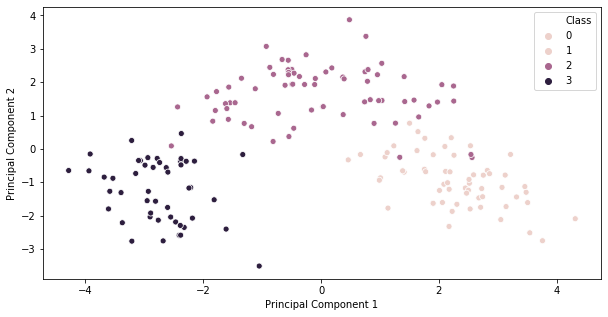

In [52]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x = wine_pca['Principal Component 1'], y = wine_pca['Principal Component 2'], hue = wine['Class'])

In [53]:
# 주성분들의 설명력을 확인합니다.
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

PC1은 데이터를 약 36% 정도, PC2는 19% 정도 설명합니다.

## FA 적용 후

In [24]:
X = wine.iloc[:, 1:].values
fa = FactorAnalysis(n_components = 13)
X_fa = fa.fit_transform(X)

wine_fa = pd.DataFrame(data = X_fa, columns = ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5', 'Factor 6', 'Factor 7', 'Factor 8', 'Factor 9', 'Factor 10', 'Factor 11','Factor 12', 'Factor 13'])

wine_fa.head()

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8,Factor 9,Factor 10,Factor 11,Factor 12,Factor 13
0,1.014302,1.635006,-0.972815,-0.188294,0.674808,0.281847,-0.224184,0.0,0.0,0.0,0.0,0.0,0.0
1,0.965034,-0.411003,-1.858834,-0.934911,-0.337345,0.217525,-0.138507,0.0,0.0,0.0,0.0,0.0,0.0
2,1.394755,-0.494738,0.210600,0.644627,0.469704,0.109788,0.125586,0.0,0.0,0.0,0.0,0.0,0.0
3,2.334586,0.015528,0.222738,0.007648,0.941469,0.205388,0.214657,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.036820,1.410068,0.092873,0.744068,0.433513,0.304921,-0.592490,0.0,0.0,0.0,0.0,0.0,0.0


Factor1~Factor7 유의미

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_fa, wine['Class'].values, test_size = 0.4, random_state = 42)
log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)

0.9861111111111112

FA 적용 후 분류모델 성능: 약 98.6%

### Factor Analysis : factor_analyzer의 FactorAnalyzer 이용

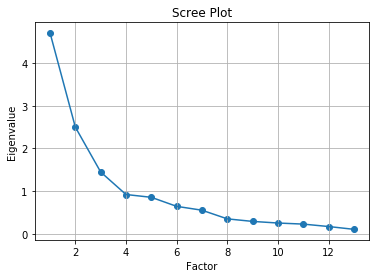

In [55]:
from factor_analyzer import FactorAnalyzer
fa_1 = FactorAnalyzer(rotation='varimax')
fa_1.fit(X)
ev, v = fa_1.get_eigenvalues()
xvals = range(1, X.shape[1]+1)

plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Scree plot으로 보아하니, 4개의 Factor를 선택하면 될 것 같다.

그렇다면 계수가 큰 순서대로, Factor1, Factor2, Factor3, Factor5를 선택하면 좋을 것 같다.